# SALES EFFECTIVENESS



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('project_sales.csv')
df.head(5)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


# Basic check

In [3]:
df.shape

(7422, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


()#### Some Data have null values

In [5]:
df.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [6]:
df.describe(include = ['O'])

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [7]:
df.Created.value_counts()

26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: Created, Length: 6752, dtype: int64

In [8]:
df.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [9]:
# drop unwanted columns
col = ['Mobile','EMAIL']
df.drop(col, axis = 1, inplace = True)

In [10]:
df.head(3)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [11]:
df.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [12]:
df.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [13]:
df.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [14]:
df.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Sales_Agent    7399 non-null   object 
 4   Location       7364 non-null   object 
 5   Delivery_Mode  7422 non-null   object 
 6   Status         7422 non-null   object 
dtypes: float64(1), object(6)
memory usage: 406.0+ KB


# Product ID

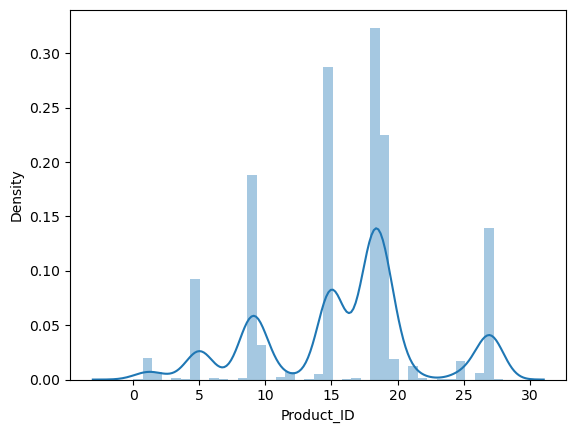

In [16]:
sns.distplot(df.Product_ID)
plt.show()

# **Insights**
- you used 15-20 product more
- it is a non normal distribution
- product 0-5 is a leaste.


# Source

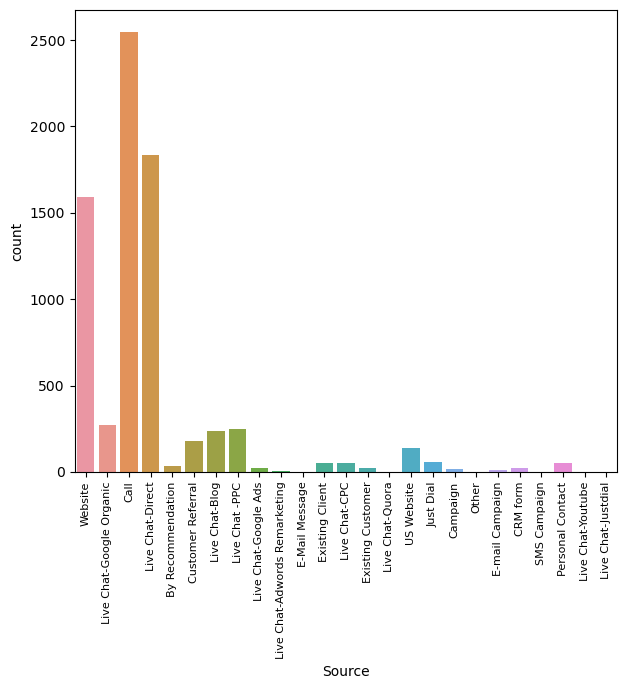

In [17]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Source',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()


# Insights:
- Call and live chat direct is more
- others, email campaign, SMS campaign, and live chat youtube and live chat justdial is least count.

# Sales Agent

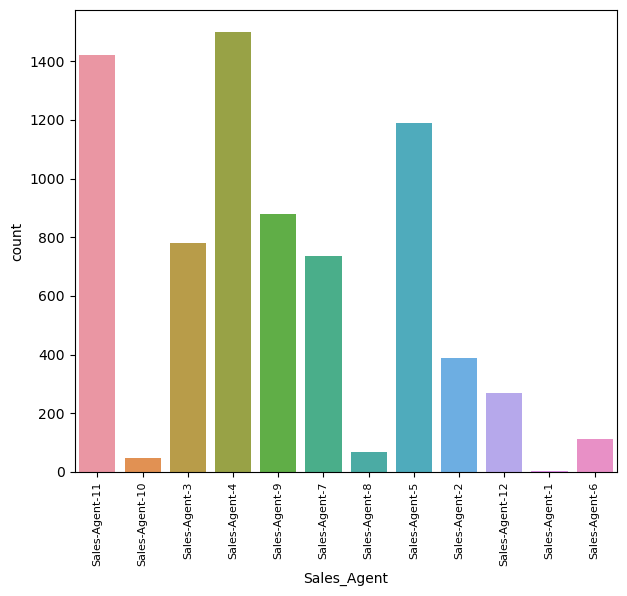

In [18]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Sales_Agent',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- Agent 11, 4, 5 count is more
- And agent 1, 10 count is least

# Location

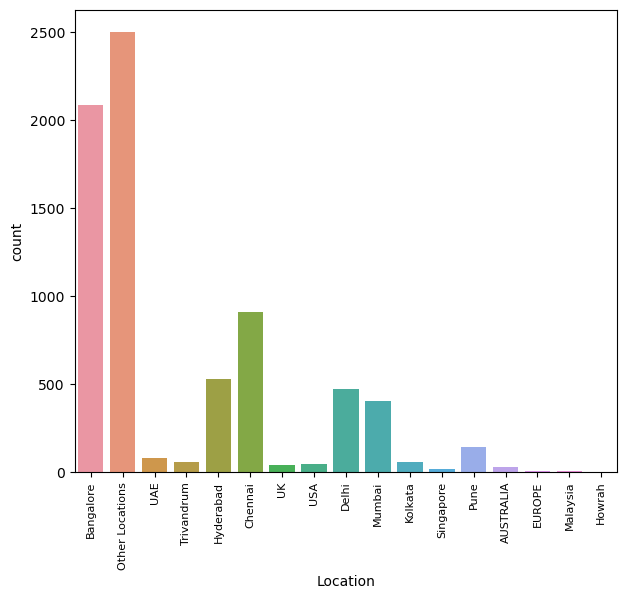

In [19]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Location',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- other Location and bangalore is more
- And howrah, malayasia and Europe count is least.

# Delivery Mode

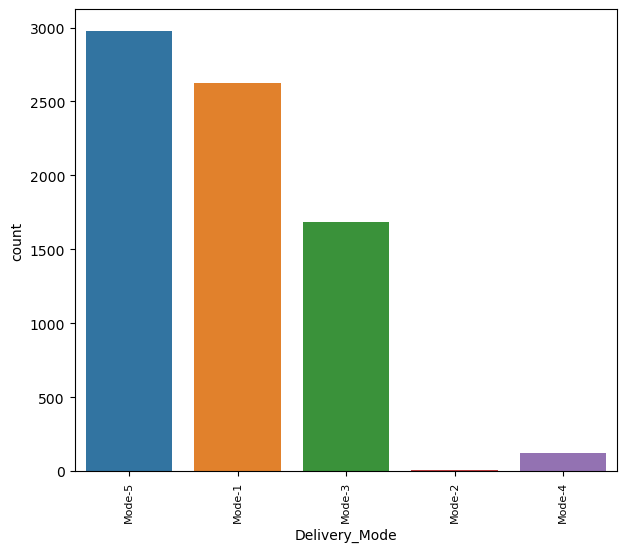

In [20]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Delivery_Mode',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- mode 5 and 1 count is more
- mode 2 count is least.

# Status

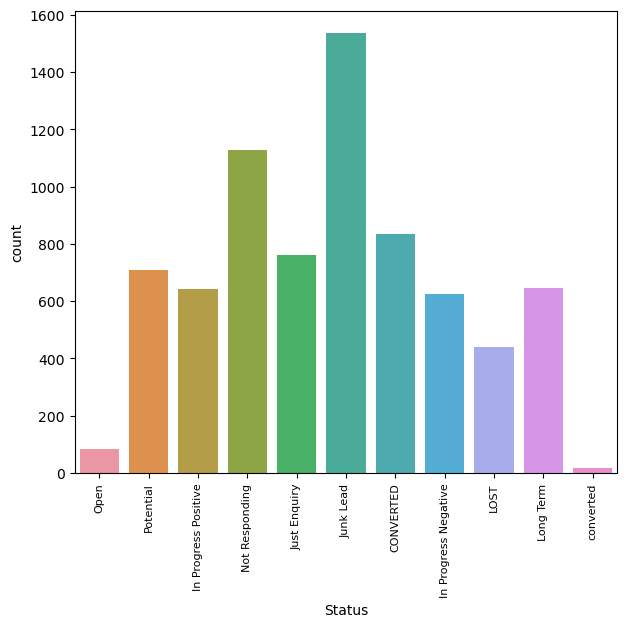

In [21]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Status',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- Just Lead and not responding count is more.
- negative respose is more
- convered and open count is least.

# Preprocessing

In [22]:
df.duplicated().sum()

11

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

Created           0
Product_ID       56
Source           17
Sales_Agent      23
Location         56
Delivery_Mode     0
Status            0
dtype: int64

## ***Product_ID Preprocess***

In [26]:
df.loc[df['Product_ID'].isnull() == True]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [27]:
df.loc[df['Product_ID'].isnull() == True, 'Product_ID'] = np.median(df.Product_ID.dropna(axis = 0))

In [28]:
df.loc[df['Product_ID'].isnull() == True]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status


## ***Source Preprocess***

In [29]:
df.loc[df['Source'].isnull() == True]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
13,13-11-2018 23:40,18.0,NaN,Sales-Agent-10,NaN,Mode-5,Open
15,13-11-2018 20:45,18.0,NaN,Sales-Agent-10,NaN,Mode-5,Open
21,13-11-2018 18:25,18.0,NaN,Sales-Agent-10,NaN,Mode-5,Open
128,10-11-2018 20:40,18.0,NaN,Sales-Agent-10,NaN,Mode-5,Open
138,10-11-2018 18:00,18.0,NaN,Sales-Agent-10,NaN,Mode-5,Open
2518,30-08-2018 20:40,18.0,NaN,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2556,29-08-2018 19:41,18.0,NaN,Sales-Agent-1,NaN,Mode-5,Open
2686,26-08-2018 11:10,9.0,NaN,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry
2712,25-08-2018 10:00,15.0,NaN,Sales-Agent-5,Mumbai,Mode-5,Junk Lead
2767,23-08-2018 14:40,15.0,NaN,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative


In [30]:
df.Source.mode()

0    Call
Name: Source, dtype: object

In [31]:
df.loc[df['Source'].isnull() == True, 'Source'] = 'Call'

In [32]:
df.loc[df['Sales_Agent'].isnull() == True]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
118,11-11-2018 12:35,5.0,Live Chat-Google Ads,NaN,Other Locations,Mode-5,Open
593,25-10-2018 18:02,15.0,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
651,24-10-2018 11:01,18.0,Website,NaN,Delhi,Mode-5,Just Enquiry
658,24-10-2018 10:18,17.0,Live Chat-Google Organic,NaN,UAE,Mode-3,Open
681,23-10-2018 12:09,15.0,Live Chat-Google Organic,NaN,Other Locations,Mode-3,Open
690,23-10-2018 11:33,15.0,Call,NaN,Other Locations,Mode-5,Open
691,23-10-2018 11:31,15.0,Call,NaN,Other Locations,Mode-5,Not Responding
884,16-10-2018 10:06,24.0,Call,NaN,Other Locations,Mode-1,Open
1109,09-10-2018 12:55,18.0,Live Chat-Direct,NaN,Bangalore,Mode-1,Potential
1490,27-09-2018 11:00,15.0,Call,NaN,Other Locations,Mode-5,Open


## ***Sales Agent Preprocess***

In [33]:
df.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [34]:
df.loc[df['Sales_Agent'].isnull() == True,'Sales_Agent'] = 'Sales-Agent-4'

In [35]:
df.loc[df['Location'].isnull() == True]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open


## ***Location preprocess***

In [36]:
df.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [37]:
df.loc[df['Location'].isnull() == True,'Location'] = 'Other Locations'

In [38]:
df.head(4)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open


In [39]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# **Status combine into positive and negative response**

In [40]:
df.Status.value_counts()

Junk Lead               1529
Not Responding          1128
CONVERTED                833
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: Status, dtype: int64

In [41]:
# Combine Status column into form Postive and Negative
df.Status.replace(['Junk Lead', 'Not Responding', 'Just Enquiry', 'LOST','In Progress Negative'] ,'Low_potential',inplace = True)
df.Status.replace(['CONVERTED', 'Potential', 'Long Term', 'In Progress Positive', 'Open', 'converted'], 'High_potential', inplace = True)  

In [42]:
df.head(4)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,High_potential
1,14-11-2018 09:22,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High_potential
2,14-11-2018 09:21,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High_potential
3,14-11-2018 08:46,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High_potential


In [43]:
df.Status.value_counts()

Low_potential     4483
High_potential    2928
Name: Status, dtype: int64

#### Postive process is marked as high potential and negative will be marked as low potential

# Product and Target

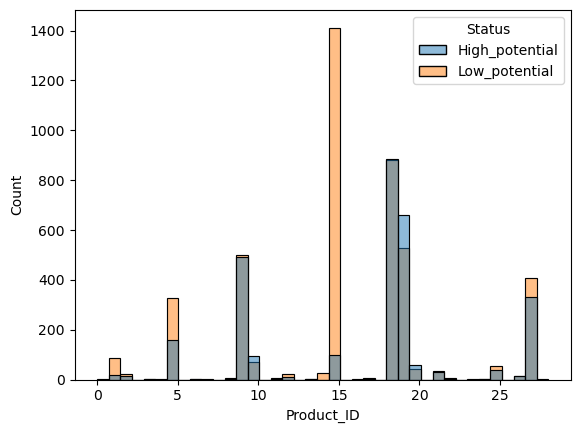

In [44]:
sns.histplot(x = 'Product_ID',data = df,hue = 'Status')
plt.show()

# Insights
- The product 15 you can be avioded and increase 18 to 20 product ID
- You used 15th product more but its response negative- 	You can increase the 18th to 20th product more because it giving positive response.- •	And you can avoid 15th ,5th, and 1st products. 


# Source

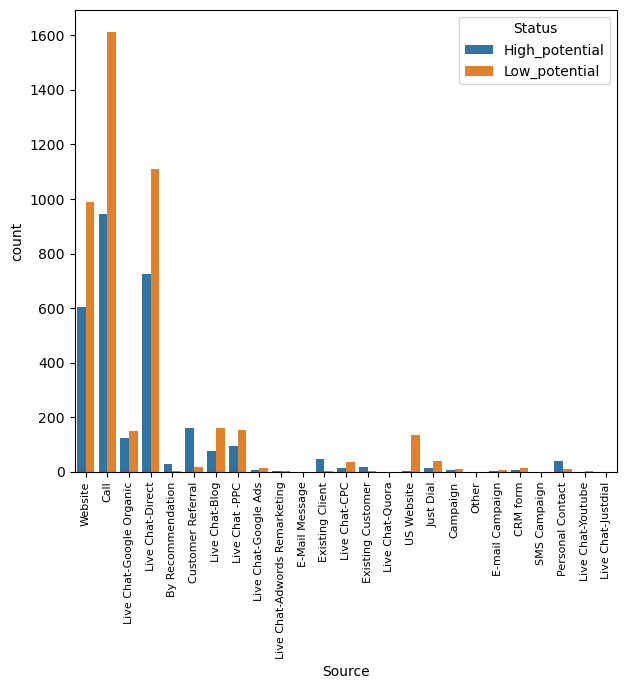

In [45]:
#same way use in Source column
plt.figure(figsize = (7,6))
sns.countplot(x = 'Source',data = df,hue = 'Status')
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- you used call source more but it giving half positive response
- And live chat is good response
- And you can improve customer referral source, because it giving more positive response for small amount of data
- And same way you can improve the Existing Client also.o.


# **Live chat**

In [46]:
#create new data column for Source
df.Source.replace(['Live Chat-Direct', 'Live Chat-Google Organic', 'Live Chat -PPC','Live Chat-Blog', 'Live Chat-CPC', 'Live Chat-Google Ads',
                   'Live Chat-Adwords Remarketing', 'Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial'],'Live_chat',inplace = True)

In [47]:
df.Source.replace(['Campaign', 'E-mail Campaign', 'SMS Campaign'],'Campaign',inplace = True)

In [48]:
df.Source.replace(['Website', 'US Website'],'Website',inplace = True)

In [49]:
df.Source.replace(['Personal Contact', 'E-Mail Message','Other'],'Personal_Contact',inplace = True)

In [50]:
df.Source.value_counts()

Live_chat            2677
Call                 2556
Website              1729
Customer Referral     179
Just Dial              56
Personal_Contact       53
Existing Client        51
Campaign               33
By Recommendation      32
CRM form               23
Existing Customer      22
Name: Source, dtype: int64

## After sort it Source.

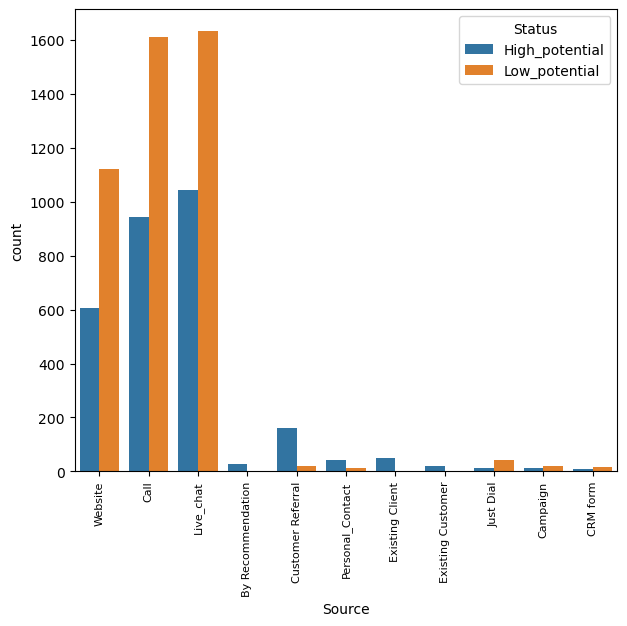

In [51]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Source',data = df,hue = 'Status')
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Location

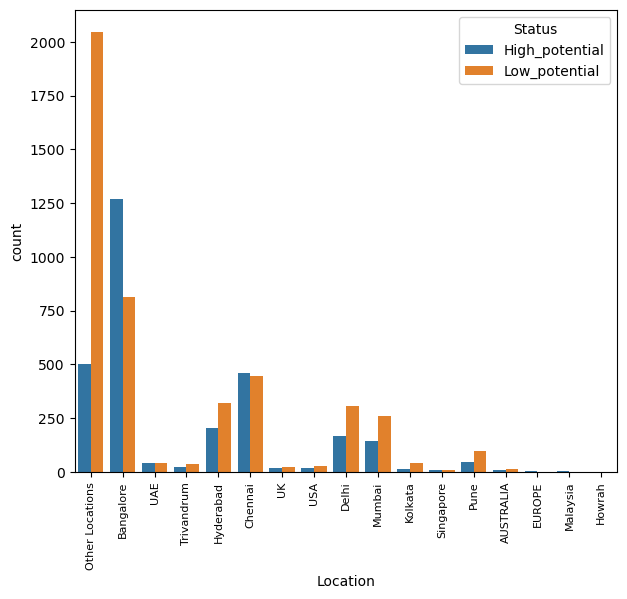

In [52]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Location',data = df,hue = 'Status')
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- In Location you used to much of other location but no use, it giving negative response
- you can increase the inside India location, particularly in Bangalore and Chennai
- you can increase the countries location
- you can decrease the other locations.


# **location new column**

In [53]:
df.Location.value_counts()

Other Locations    2548
Bangalore          2083
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [54]:
df.Location.replace(['USA', 'UK', 'AUSTRALIA','UAE'], 'Countries',inplace = True)

In [55]:
df.Location.replace(['Other Locations','Howrah'],'Other_location',inplace = True)

In [56]:
df.Location.replace(['Singapore','Malaysia','EUROPE'],'Asian_Countries',inplace = True)
df.Location.replace(['Bangalore', 'Chennai', 'Hyderabad', 'Delhi', 'Mumbai', 'Pune','Trivandrum','Kolkata'],'In_India',inplace = True)

In [57]:
df.Location.value_counts()

In_India           4648
Other_location     2549
Countries           190
Asian_Countries      24
Name: Location, dtype: int64

## After sort it Location.

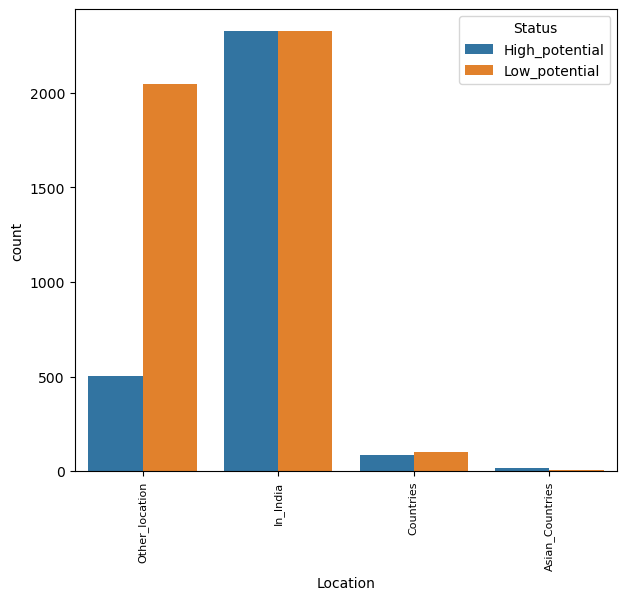

In [58]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Location',data = df,hue = 'Status')
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- Indian Location is best.
- High potential and low potential is same,in future you increase indian location. 

# Source*Location

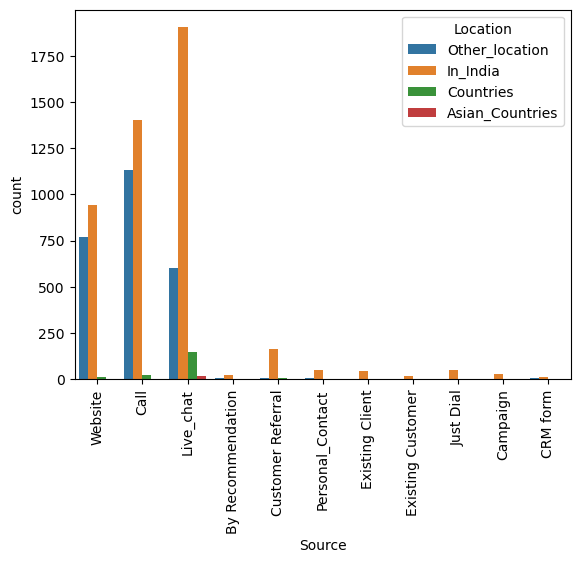

In [59]:
sns.countplot(x = 'Source',data = df ,hue = 'Location')
plt.xticks(rotation = 90)
plt.show()

In [60]:
df.Location.unique()

array(['Other_location', 'In_India', 'Countries', 'Asian_Countries'],
      dtype=object)

In [61]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,Sales-Agent-11,Other_location,Mode-5,High_potential
1,14-11-2018 09:22,18.0,Website,Sales-Agent-10,Other_location,Mode-5,High_potential
2,14-11-2018 09:21,18.0,Website,Sales-Agent-10,Other_location,Mode-5,High_potential
3,14-11-2018 08:46,18.0,Website,Sales-Agent-10,Other_location,Mode-5,High_potential
4,14-11-2018 07:34,18.0,Website,Sales-Agent-10,Other_location,Mode-5,High_potential


# Sales Agent

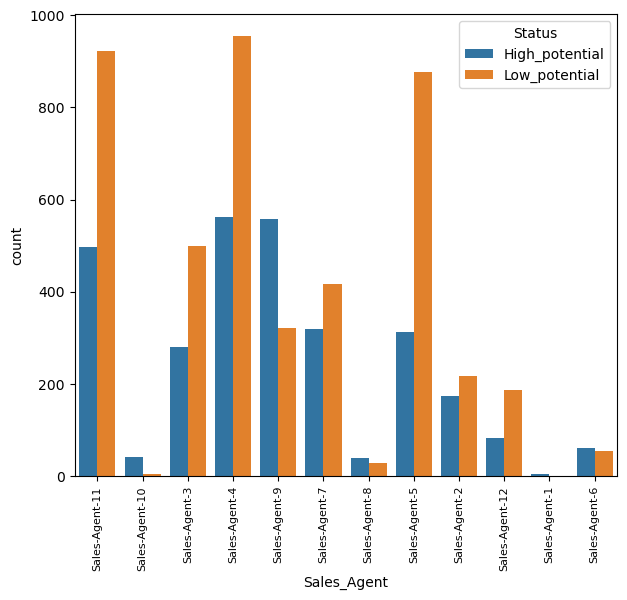

In [62]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Sales_Agent',hue = 'Status',data = df)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- you used Agent 4, 11, 5 more and 4, 11 its ok, it giving half off positive response but 5 works waste you can remove Agent 5.
- And you can increase the Agent 9, 10 tasks ,because it works well
- And you can decrease the task for Agent 11, 9, 5..


# Sales Agent in location 

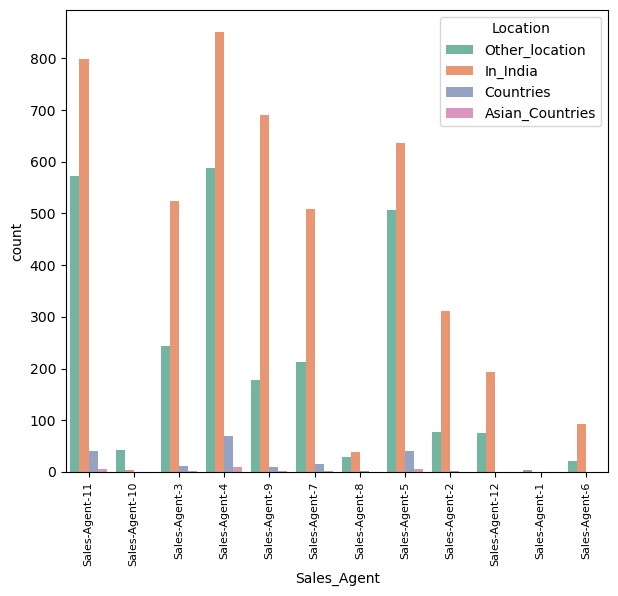

In [63]:
s = sns.color_palette("Set2")
plt.figure(figsize = (7,6))
sns.countplot(x = 'Sales_Agent',hue = 'Location',data = df,palette = s)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- Every Agent is performs more in India Location and other location.
- least count is Asian counties

# **Sales Agent Encoding**

In [64]:
df.Sales_Agent.value_counts()

Sales-Agent-4     1518
Sales-Agent-11    1418
Sales-Agent-5     1189
Sales-Agent-9      879
Sales-Agent-3      780
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [65]:
df['Sales_Agent'] = df.Sales_Agent.map({'Sales-Agent-4':4 ,'Sales-Agent-11':11 , 'Sales-Agent-5':5,'Sales-Agent-9':9,
                                        'Sales-Agent-3':3,'Sales-Agent-7':7,'Sales-Agent-2':2,'Sales-Agent-12':12,'Sales-Agent-6':6,
                                        'Sales-Agent-8':8,'Sales-Agent-10':10,'Sales-Agent-1':1})

In [66]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,11,Other_location,Mode-5,High_potential
1,14-11-2018 09:22,18.0,Website,10,Other_location,Mode-5,High_potential
2,14-11-2018 09:21,18.0,Website,10,Other_location,Mode-5,High_potential
3,14-11-2018 08:46,18.0,Website,10,Other_location,Mode-5,High_potential
4,14-11-2018 07:34,18.0,Website,10,Other_location,Mode-5,High_potential


## Delivery mode

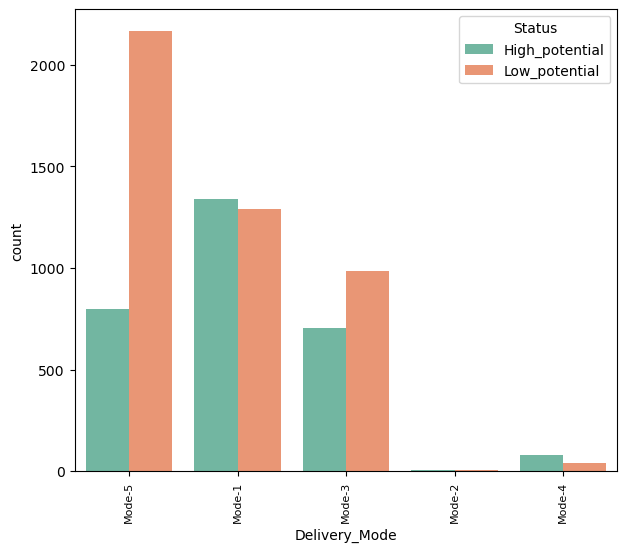

In [67]:
s = sns.color_palette("Set2")
plt.figure(figsize = (7,6))
sns.countplot(x = 'Delivery_Mode',hue = 'Status',data = df,palette = s)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights
- Mode-2 and 3 is performs good
- And you can remove the Mode-5

## Delivery mode in location.

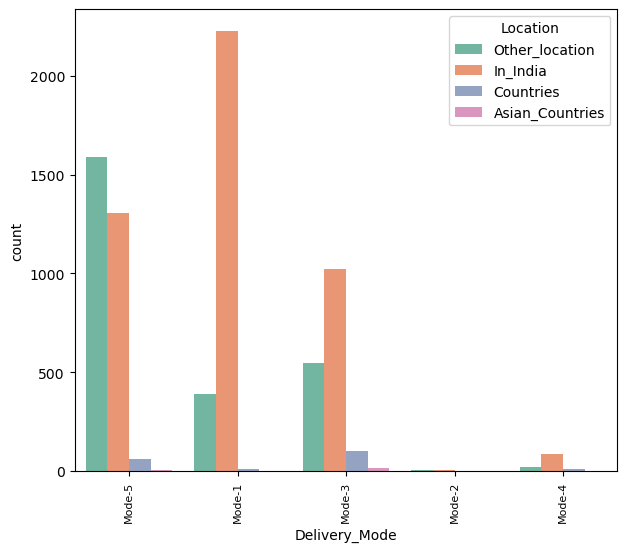

In [68]:
s = sns.color_palette("Set2")
plt.figure(figsize = (7,6))
sns.countplot(x = 'Delivery_Mode',hue = 'Location',data = df,palette = s)
plt.xticks(fontsize = 8,rotation = 90)
plt.show()

# Insights 
- Delivery mode, in India and Other location is higher level
- Asian COuntries count is least

# Encoding

In [69]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,11,Other_location,Mode-5,High_potential
1,14-11-2018 09:22,18.0,Website,10,Other_location,Mode-5,High_potential
2,14-11-2018 09:21,18.0,Website,10,Other_location,Mode-5,High_potential
3,14-11-2018 08:46,18.0,Website,10,Other_location,Mode-5,High_potential
4,14-11-2018 07:34,18.0,Website,10,Other_location,Mode-5,High_potential


## **Source Encoding**

In [70]:
df.Source.unique()

array(['Website', 'Call', 'Live_chat', 'By Recommendation',
       'Customer Referral', 'Personal_Contact', 'Existing Client',
       'Existing Customer', 'Just Dial', 'Campaign', 'CRM form'],
      dtype=object)

In [71]:
df['Source'] = df.Source.map({'Call':1,'Live_chat':2,'Website':3,'Customer Referral':4,'By Recommendation':5,'Personal_Contact':6,
                              'Existing Client':7,'Just Dial':8,'Campaign':9,'CRM form':10,'Existing Customer':11})

In [72]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,3,11,Other_location,Mode-5,High_potential
1,14-11-2018 09:22,18.0,3,10,Other_location,Mode-5,High_potential
2,14-11-2018 09:21,18.0,3,10,Other_location,Mode-5,High_potential
3,14-11-2018 08:46,18.0,3,10,Other_location,Mode-5,High_potential
4,14-11-2018 07:34,18.0,3,10,Other_location,Mode-5,High_potential


## **Location Encoding**

In [73]:
df.Location.unique()

array(['Other_location', 'In_India', 'Countries', 'Asian_Countries'],
      dtype=object)

In [74]:
df['Location'] = df.Location.map({'Other_location':2,'In_India':1,'Asian_Countries':3,'Countries':4})

In [75]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,3,11,2,Mode-5,High_potential
1,14-11-2018 09:22,18.0,3,10,2,Mode-5,High_potential
2,14-11-2018 09:21,18.0,3,10,2,Mode-5,High_potential
3,14-11-2018 08:46,18.0,3,10,2,Mode-5,High_potential
4,14-11-2018 07:34,18.0,3,10,2,Mode-5,High_potential


## **Delivery mode Encoding**

In [76]:
df.Delivery_Mode.unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [77]:
df['Delivery_Mode'] = df.Delivery_Mode.map({'Mode-1':1, 'Mode-2':2, 'Mode-3':3,'Mode-4':4,'Mode-5':5})

In [78]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,3,11,2,5,High_potential
1,14-11-2018 09:22,18.0,3,10,2,5,High_potential
2,14-11-2018 09:21,18.0,3,10,2,5,High_potential
3,14-11-2018 08:46,18.0,3,10,2,5,High_potential
4,14-11-2018 07:34,18.0,3,10,2,5,High_potential


## **Status Encoding**

In [79]:
df.Status.unique()

array(['High_potential', 'Low_potential'], dtype=object)

In [80]:
df['Status'] = df.Status.map({'Low_potential':0,'High_potential':1})

In [81]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,3,11,2,5,1
1,14-11-2018 09:22,18.0,3,10,2,5,1
2,14-11-2018 09:21,18.0,3,10,2,5,1
3,14-11-2018 08:46,18.0,3,10,2,5,1
4,14-11-2018 07:34,18.0,3,10,2,5,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7411 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7411 non-null   object 
 1   Product_ID     7411 non-null   float64
 2   Source         7411 non-null   int64  
 3   Sales_Agent    7411 non-null   int64  
 4   Location       7411 non-null   int64  
 5   Delivery_Mode  7411 non-null   int64  
 6   Status         7411 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 463.2+ KB


In [83]:
# drop unwanted column
df.drop('Created' ,axis = 1,inplace = True)

In [84]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18.0,3,11,2,5,1
1,18.0,3,10,2,5,1
2,18.0,3,10,2,5,1
3,18.0,3,10,2,5,1
4,18.0,3,10,2,5,1


# **Correlation**

In [85]:
e = df.corr()
print(e)

               Product_ID    Source  Sales_Agent  Location  Delivery_Mode  \
Product_ID       1.000000  0.043854    -0.028300 -0.024625      -0.032729   
Source           0.043854  1.000000     0.019838 -0.076364      -0.202715   
Sales_Agent     -0.028300  0.019838     1.000000 -0.011383       0.080872   
Location        -0.024625 -0.076364    -0.011383  1.000000       0.296381   
Delivery_Mode   -0.032729 -0.202715     0.080872  0.296381       1.000000   
Status           0.086187  0.095858     0.047320 -0.198308      -0.208036   

                 Status  
Product_ID     0.086187  
Source         0.095858  
Sales_Agent    0.047320  
Location      -0.198308  
Delivery_Mode -0.208036  
Status         1.000000  


In [86]:
#split
X = df.drop('Status',axis = 1)
y = df['Status']

In [87]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,18.0,3,11,2,5
1,18.0,3,10,2,5
2,18.0,3,10,2,5
3,18.0,3,10,2,5
4,18.0,3,10,2,5


In [88]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

# Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [90]:
sel =  ss.fit_transform(X)
sel

array([[ 0.33606464,  0.62180254,  1.41033752,  0.89982699,  1.08922158],
       [ 0.33606464,  0.62180254,  1.09163006,  0.89982699,  1.08922158],
       [ 0.33606464,  0.62180254,  1.09163006,  0.89982699,  1.08922158],
       ...,
       [-1.81112518, -0.1018436 ,  1.41033752, -0.67147787, -1.21088417],
       [ 0.83156998,  5.68732552, -0.82061475,  0.89982699, -1.21088417],
       [ 1.49224377,  0.62180254, -1.13932221, -0.67147787, -1.21088417]])

In [91]:
x = pd.DataFrame(data = sel,columns = X.columns)

In [92]:
x.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.336065,0.621803,1.410338,0.899827,1.089222
1,0.336065,0.621803,1.091630,0.899827,1.089222
2,0.336065,0.621803,1.091630,0.899827,1.089222
3,0.336065,0.621803,1.091630,0.899827,1.089222
4,0.336065,0.621803,1.091630,0.899827,1.089222


In [93]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.336065,0.621803,1.410338,0.899827,1.089222
1,0.336065,0.621803,1.091630,0.899827,1.089222
2,0.336065,0.621803,1.091630,0.899827,1.089222
3,0.336065,0.621803,1.091630,0.899827,1.089222
4,0.336065,0.621803,1.091630,0.899827,1.089222
...,...,...,...,...,...
7406,-1.150451,-0.825490,-0.183200,-0.671478,0.514195
7407,-0.159441,-0.825490,1.729045,0.899827,1.089222
7408,-1.811125,-0.101844,1.410338,-0.671478,-1.210884
7409,0.831570,5.687326,-0.820615,0.899827,-1.210884


# **Spliting**


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [95]:
x_train.shape

(5928, 5)

In [96]:
x_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
7288,1.822581,0.621803,-0.820615,-0.671478,-1.210884
1049,-0.820114,-0.101844,0.772923,0.899827,-0.060831
626,0.336065,-0.101844,0.135508,-0.671478,-1.210884
2018,-0.159441,0.621803,-0.501907,0.899827,-0.060831
1223,1.822581,-0.825490,0.772923,-0.671478,-1.210884
...,...,...,...,...,...
5191,-1.150451,-0.101844,-0.820615,-0.671478,1.089222
5226,-1.150451,0.621803,-0.820615,0.899827,1.089222
5390,-0.159441,0.621803,1.410338,0.899827,1.089222
860,-1.811125,-0.825490,-0.820615,-0.671478,-1.210884


In [97]:
y_train

7299    0
1051    0
628     0
2021    0
1225    1
       ..
5199    0
5234    0
5399    0
862     1
7281    0
Name: Status, Length: 5928, dtype: int64

# **Model Creation**

In [98]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

# *****Existing Algorithms*****

# ***ANN***

In [99]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (100,3), max_iter = 50, learning_rate_init = 0.1,random_state = 2)

In [100]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 3), learning_rate_init=0.1, max_iter=50,
              random_state=2)

In [101]:
#Testing
y1_pred = mlp.predict(x_test)
y1_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [102]:
#Training
x1_pred = mlp.predict(x_train)
x1_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [103]:
print(f'Trianing score:{accuracy_score(y_train,x1_pred)}')
print(f'Testing score:{accuracy_score(y_test,y1_pred)}')

Trianing score:0.6825236167341431
Testing score:0.6911665542818611


In [104]:
print(f'TR:{classification_report(y_train,x1_pred)}')
print(f'TE:{classification_report(y_test,y1_pred)}')

TR:              precision    recall  f1-score   support

           0       0.70      0.84      0.76      3580
           1       0.64      0.45      0.53      2348

    accuracy                           0.68      5928
   macro avg       0.67      0.64      0.64      5928
weighted avg       0.68      0.68      0.67      5928

TE:              precision    recall  f1-score   support

           0       0.70      0.86      0.77       903
           1       0.66      0.43      0.52       580

    accuracy                           0.69      1483
   macro avg       0.68      0.64      0.65      1483
weighted avg       0.69      0.69      0.67      1483



#### **This model performs good but little overfitted because ANN model needs large amount data.**

# ***SVC***

In [105]:
from sklearn.svm import SVC
sv = SVC()

In [106]:
sv.fit(x_train,y_train)

SVC()

In [107]:
#Testing
y2_pred = sv.predict(x_test)
y2_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [108]:
#Training
x2_pred = sv.predict(x_train)
x2_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [109]:
print(f'Training score:{accuracy_score(y_train,x2_pred)}')
print(f'Testing score:{accuracy_score(y_test,y2_pred)}')

Training score:0.6950067476383266
Testing score:0.6958867161159811


In [110]:
print(f'Tr:{classification_report(y_train,x2_pred)}')
print(f'Ts:{classification_report(y_test,y2_pred)}')

Tr:              precision    recall  f1-score   support

           0       0.70      0.85      0.77      3580
           1       0.67      0.45      0.54      2348

    accuracy                           0.70      5928
   macro avg       0.69      0.65      0.66      5928
weighted avg       0.69      0.70      0.68      5928

Ts:              precision    recall  f1-score   support

           0       0.71      0.85      0.77       903
           1       0.66      0.45      0.54       580

    accuracy                           0.70      1483
   macro avg       0.69      0.65      0.65      1483
weighted avg       0.69      0.70      0.68      1483



# ****Cross valid score****

In [111]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(sv,x,y,cv = 2,scoring = 'f1')
print(score)
print('c_v_s:',score.mean())
print('std:',score.std())
#std of < 0.05 is good model

[0.4043051  0.54018006]
c_v_s: 0.47224258031416805
std: 0.06793747970583858


### ***SVC is not fit for this data.***

# ***Proposed Algorithms***

# ***DecisionTreeClassifier***

In [112]:
from sklearn.tree import DecisionTreeClassifier
te = DecisionTreeClassifier()
te.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
pred1 = te.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
p_train1 = te.predict(x_train)
p_train1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [115]:
#Scores
#Training score
train2 =  accuracy_score(y_train,p_train1)
print(f' Training score:{train2}')
test2 = accuracy_score(y_test,pred1)
print(f' Testing score:{test2}')

 Training score:0.7828947368421053
 Testing score:0.7161159811193527


In [116]:
#report
print(f'Ts:{classification_report(y_train,p_train1)}')
print(f'T:{classification_report(y_test,pred1)}')

Ts:              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3580
           1       0.77      0.64      0.70      2348

    accuracy                           0.78      5928
   macro avg       0.78      0.76      0.77      5928
weighted avg       0.78      0.78      0.78      5928

T:              precision    recall  f1-score   support

           0       0.74      0.82      0.78       903
           1       0.66      0.55      0.60       580

    accuracy                           0.72      1483
   macro avg       0.70      0.69      0.69      1483
weighted avg       0.71      0.72      0.71      1483



# ***Hyper parameter tunning***

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}
dc = DecisionTreeClassifier()
ad = GridSearchCV(dc,param_grid,scoring = 'f1',cv = 5)
ad.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [118]:
best_para1 = ad.best_params_
print(f'Best parameter:{best_para1}')

Best parameter:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [119]:
dc1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf= 1,min_samples_split= 5)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [120]:
pred2 = dc1.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
tr2 = dc1.predict(x_train)
tr2

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [122]:
#Scores
#Training score
tr =  accuracy_score(y_train,tr2)
print(f' Training score:{train2}')
te = accuracy_score(y_test,pred2)
print(f' Testing score:{test2}')

 Training score:0.7828947368421053
 Testing score:0.7161159811193527


In [123]:
#report
print(f'Ts:{classification_report(y_train,tr2)}')
print(f'T:{classification_report(y_test,pred2)}')

Ts:              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3580
           1       0.73      0.55      0.63      2348

    accuracy                           0.74      5928
   macro avg       0.74      0.71      0.71      5928
weighted avg       0.74      0.74      0.73      5928

T:              precision    recall  f1-score   support

           0       0.73      0.85      0.79       903
           1       0.69      0.52      0.59       580

    accuracy                           0.72      1483
   macro avg       0.71      0.68      0.69      1483
weighted avg       0.71      0.72      0.71      1483



# ***Cross Valuate Score***

In [124]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dc1,x,y,cv = 2,scoring = 'f1')
print(score)
print('c_v_s:',score.mean())
print('std:',score.std())
#std of < 0.05 is good model

[0.54500354 0.54590222]
c_v_s: 0.545452879777578
std: 0.00044933619146880766


#### ***IN Decision tree before and after parameter tunning it comes same score and cross_Value Score is 0.004.***

# ***RandomForestClassifier***

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model1 = RandomForestClassifier(n_estimators = 100)

In [127]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [128]:
pred = model1.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
p_train = model1.predict(x_train)
p_train

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [130]:
#Scores
#Training score
train1 =  accuracy_score(y_train,p_train)
print(f' Training score:{train1}')
test1 = accuracy_score(y_test,pred)
print(f' Testing score:{test1}')

 Training score:0.7828947368421053
 Testing score:0.7154416722859069


In [131]:
#Training report
tra = classification_report(y_train,p_train)
print(tra)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      3580
           1       0.74      0.69      0.72      2348

    accuracy                           0.78      5928
   macro avg       0.77      0.77      0.77      5928
weighted avg       0.78      0.78      0.78      5928



In [132]:
#testing report
tes = classification_report(y_test,pred)
print(tes)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       903
           1       0.65      0.59      0.62       580

    accuracy                           0.72      1483
   macro avg       0.70      0.69      0.70      1483
weighted avg       0.71      0.72      0.71      1483



# ***Hyperparameter tuning for RandomForestClassifier***

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
params = {'n_estimators' :[int(x) for x in np.linspace(200,2000,10)],
           'max_features' : ['log', 'sqrt'],'max_depth' : [None, 10, 20, 30],
          'min_samples_split' : [2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[1,2,3,4]
         }
rc = RandomForestClassifier(random_state = 42)
rscv = RandomizedSearchCV(rc,params,scoring = 'f1',n_iter = 20,cv = 5,verbose = 3,n_jobs = -1,
                          random_state = 42)

rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['log', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [135]:
best_para = rscv.best_params_
print(f'Best parameter:{best_para}')

Best parameter:{'n_estimators': 1400, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [136]:
model2 = RandomForestClassifier(n_estimators = 1400,min_samples_split = 3,min_samples_leaf = 2,max_features = 'sqrt',
                                max_depth = None)

In [137]:
model2.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,
                       n_estimators=1400)

In [138]:
#testing
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
#training
x_pred = model2.predict(x_train)
x_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [140]:
print(f'Training score:{accuracy_score(y_train,x_pred)}')
print(f'Testing score:{accuracy_score(y_test,y_pred)}')

Training score:0.770748987854251
Testing score:0.7181389076196898


In [141]:
#report
print(f'Ts:{classification_report(y_train,x_pred)}')
print(f'T:{classification_report(y_test,y_pred)}')

Ts:              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3580
           1       0.74      0.66      0.69      2348

    accuracy                           0.77      5928
   macro avg       0.76      0.75      0.76      5928
weighted avg       0.77      0.77      0.77      5928

T:              precision    recall  f1-score   support

           0       0.75      0.81      0.78       903
           1       0.66      0.57      0.61       580

    accuracy                           0.72      1483
   macro avg       0.70      0.69      0.70      1483
weighted avg       0.71      0.72      0.71      1483



In [142]:
score = cross_val_score(model2,x,y,cv = 2,scoring = 'f1')
print(score)
print('c_v_s:',score.mean())
print('std:',score.std())
#std of < 0.05 is good model

[0.59391396 0.5810209 ]
c_v_s: 0.5874674267481532
std: 0.0064465291804931


#### *RandomForestClassifier is performs good,it comes 0.71 ,its a good score.it is a good model*

# ***Boosting models***

## XGBoosting

In [143]:
from xgboost import XGBClassifier
c = XGBClassifier(n_estimators = 100)
c.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [144]:
x6_pred = c.predict(x_train)
x6_pred

array([0, 0, 1, ..., 0, 0, 1])

In [145]:
y6_pred = c.predict(x_test)
y6_pred

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
print(f'Training score:{accuracy_score(y_train,x6_pred)}')
print(f'Testing score:{accuracy_score(y_test,y6_pred)}')

Training score:0.7587719298245614
Testing score:0.7174645987862441


In [147]:
print(f'TR:{classification_report(y_train,x6_pred)}')
print(f'TS:{classification_report(y_test,y6_pred)}')

TR:              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3580
           1       0.72      0.64      0.68      2348

    accuracy                           0.76      5928
   macro avg       0.75      0.74      0.74      5928
weighted avg       0.76      0.76      0.76      5928

TS:              precision    recall  f1-score   support

           0       0.75      0.81      0.78       903
           1       0.66      0.57      0.61       580

    accuracy                           0.72      1483
   macro avg       0.70      0.69      0.70      1483
weighted avg       0.71      0.72      0.71      1483



## XGBoost HyperParameter Tunning

In [148]:
params = {'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2,0.3]}

xgb = XGBClassifier()
gcv = GridSearchCV(xgb,params,scoring = 'f1',cv = 7,n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [149]:
best_params = gcv.best_params_
print(f'Best params:{best_params}')

Best params:{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [150]:
xb = XGBClassifier(colsample_bytree = 1.0, gamma = 0.2, learning_rate = 0.2, max_depth = 3, min_child_weight = 1,n_estimators = 200,
                 random_state = 42)
xb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [151]:
x7_pred = xb.predict(x_train)
x7_pred

array([1, 0, 1, ..., 0, 0, 1])

In [152]:
y7_pred = xb.predict(x_test)
y7_pred

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
print(f'Training score:{accuracy_score(y_train,x7_pred)}')
print(f'Testing score:{accuracy_score(y_test,y7_pred)}')

Training score:0.7285762483130904
Testing score:0.7228590694538098


In [154]:
print(f'TR:{classification_report(y_train,x7_pred)}')
print(f'TS:{classification_report(y_test,y7_pred)}')

TR:              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3580
           1       0.69      0.58      0.63      2348

    accuracy                           0.73      5928
   macro avg       0.72      0.70      0.71      5928
weighted avg       0.72      0.73      0.72      5928

TS:              precision    recall  f1-score   support

           0       0.74      0.83      0.79       903
           1       0.68      0.55      0.61       580

    accuracy                           0.72      1483
   macro avg       0.71      0.69      0.70      1483
weighted avg       0.72      0.72      0.72      1483



### ***cross valid score for XGB.***

In [155]:
score = cross_val_score(xb,x,y,cv = 2,scoring = 'f1')
print(score)
print('c_v_s:',score.mean())
print('std:',score.std())
#std of < 0.05 is good model

[0.58306538 0.58914729]
c_v_s: 0.5861063336573693
std: 0.0030409531643361687


In [156]:
a = 0.0030409
b = 0.05
if a<b:
    print('XGBoost is a Good model')
else:
    print('It is a bad model')

XGBoost is a Good model


### ***In boosting model XGBoost is a best.***

# Conclusion:
This project is really complicated. The main Aim of project is to find the sales effectiveness, and find how to increase the sales effectiveness. I’m used EDA to find the sales effectiveness and how to increase the positive effectiveness. Each features giving some important insights for how to increase the positive sales effectiveness. It’s a good project, And also I gain more Technical knowledge from this project. 



Finally, the XGBoost, Decision Tree and Random Forest is a good model out of 7 models. And  I checks cross validation score, the result std is less than 0.05 in XGBoost, Decision Tree and Random Forest Classifier models.

Finally, you can increase the positive sales effectiveness by,

- Products,- The product 15 you can avoid and increase 18 to 20 product ID.
- You can increase the 18th to 20th product more because it giving positive response. And you can avoid 15th ,5th, and 1st products.
- Source,
- And you can improve customer referral source, because it giving more positive response for small amount of data.
- And same way you can improve the Existing Client also.d- Location,
- IN location you used too much of other location but no use, it giving negative response.
- you can increase the inside India location , particularly in Bangalore and Chennai.
- you can improve countries location.
- you can decrease the other location. 	- Sales Agent,
- you used Agent 4, 11, 5 more and 4, 11 its ok, it giving half off positive response but 5 works worst ,you can remove agent 5.
- And you can increase the Agent 9, 10 tasks because it works well
- And you can decrease the task for 11, 9, 5.
- Sales Agent in Location,
- Every Agent is performing more in India location and other location.
- least count is Asian countries.
- Delivery Mode,
- Mode 2 and 3 is performs well.
- And you can remove mode 5.
- Delivery mode in Location,
- Asian countries count is least.
- India location and other location is higher level.
- you can aviod Asian Countries. can avoid Asian Countries.
